In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

In [2]:
# import fake Self-Sufficiency Matrix data

SSM_df = pd.read_csv('SSM_data.csv')
print(SSM_df)

   Customer ID Full Name Assessment Date  Score
0         4598  Jane Doe          2/8/22     45
1         4598  Jane Doe         7/17/22     57
2         4598  Jane Doe         3/15/23     72
3         4598  Jane Doe         1/22/24     88


[Text(0.5, 1.0, "Jane Doe's SSM Score Over Time")]

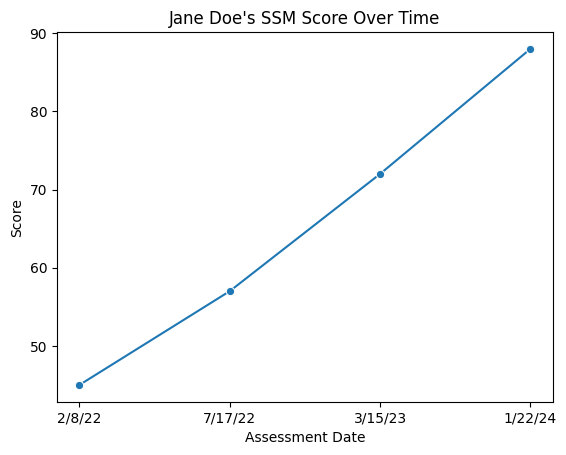

In [3]:
# SSM data line graph
# seaborn

sns.lineplot(data = SSM_df, x = 'Assessment Date', y = 'Score', marker='o').set(title="Jane Doe's SSM Score Over Time")


In [4]:
 # import fake customer demographics

Demographics_df = pd.read_excel('Demographic_data.xlsx')
print(Demographics_df)

   Customer ID First Name Last Name     Gender                       Race  \
0            1       Jane       Doe     Female                      White   
1            2        Bob   Johnson       Male  Black or African American   
2            3       Jill  Williams     Female                      Asian   
3            4       Toni     Smith  Nonbinary                      White   
4            5  Stephanie  Anderson     Female  Black or African American   
5            6    Melissa     Brown     Female                      White   
6            7    Allison    Burton     Female                      White   
7            8      Peggy     Baker     Female          Native/Indigenous   
8            9      Sarah    Truman     Female                      White   
9           10      James    Fields       Male                      White   

  Highest Level of Education   Employment Status  Monthly Household Income  \
0                High School      Unable to work                         0

Highest Level of Education
Associates degree    1
Bachelor's degree    1
GED                  2
High School          6
Name: Customer ID, dtype: int64


<Axes: title={'center': 'Number of Customers by Highest Level of Education'}, ylabel='Highest Level of Education'>

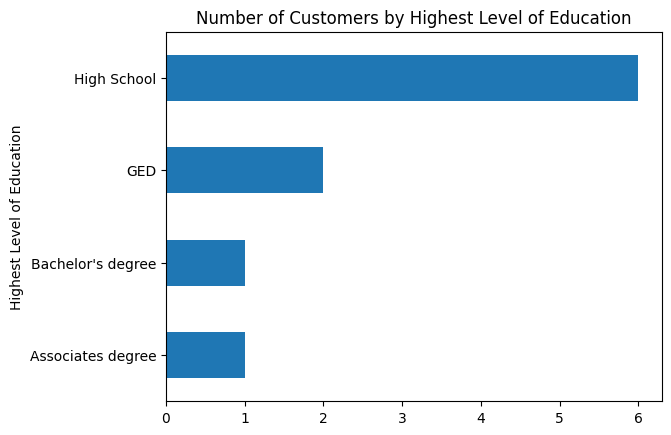

In [5]:
# Bar graph of highest level of education
# pandas

grouped_highest_level_ed_df = Demographics_df.groupby('Highest Level of Education')['Customer ID'].nunique()
print(grouped_highest_level_ed_df)
grouped_highest_level_ed_df.plot(kind='barh', title = 'Number of Customers by Highest Level of Education')

<Axes: title={'center': 'Customers by Race'}, xlabel='Race'>

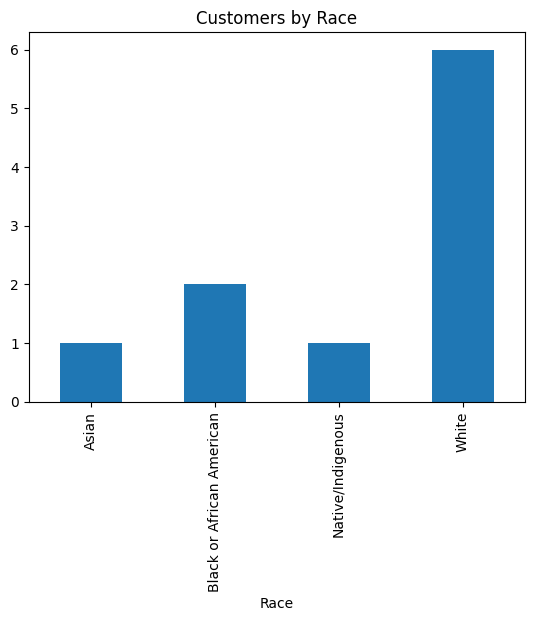

In [6]:
# Bar graph of race
# pandas

race_counts = Demographics_df.groupby('Race')['Customer ID'].nunique()
race_counts.plot(kind = 'bar', title = "Customers by Race", rot=90)

Index(['Race', 'Customer ID'], dtype='object')


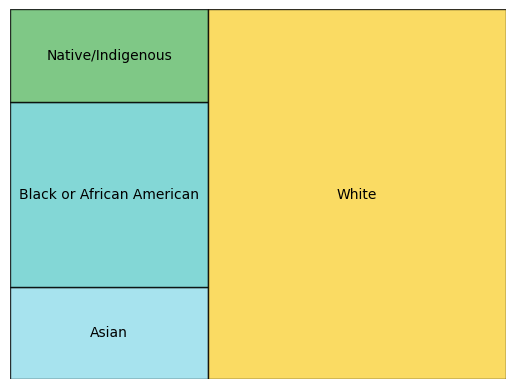

In [7]:
# Tree map of race
# matplotlib

racecounts_df = race_counts.to_frame().reset_index()

print(racecounts_df.columns)

colors = ['#91DCEA', '#64CDCC', '#5FBB68',
          '#F9D23C', '#F9A729', '#FD6F30']

squarify.plot(sizes=race_counts, label=racecounts_df['Race'], ec = 'black', alpha = 0.8, color = colors)
plt.axis('off')
plt.show()

NameError: name 'np' is not defined

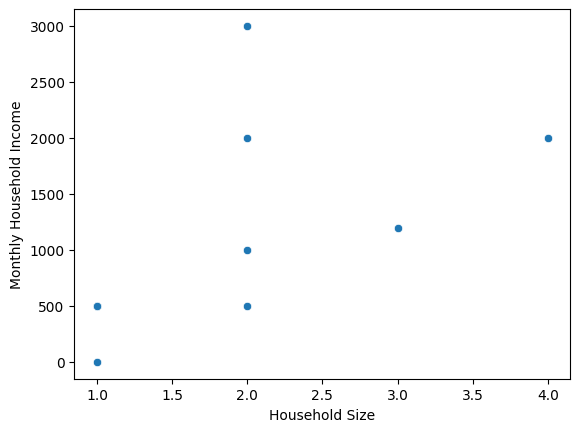

In [8]:
# Scatter plot
# seaborn

sns.scatterplot(data = Demographics_df, x = 'Household Size', y = 'Monthly Household Income')
plt.xticks(np.arange(Demographics_df['Household Size'].min(), Demographics_df['Household Size'].max()+1, 1))
plt.show()

<Axes: xlabel='Race'>

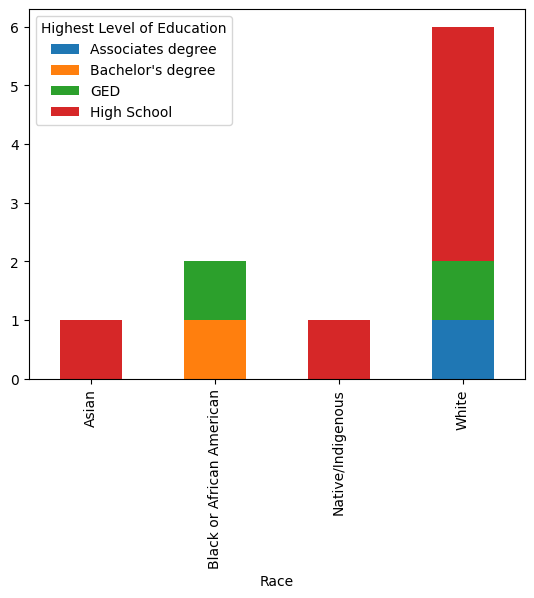

In [ ]:
# Race and Highest Level of Education stacked bar chart
# pandas

Race_ed_df = Demographics_df.groupby(['Race','Highest Level of Education'])['Customer ID'].nunique().unstack()
Race_ed_df.plot(kind='bar', stacked=True)